# Project: Titanic - Machine Learning from Disaster

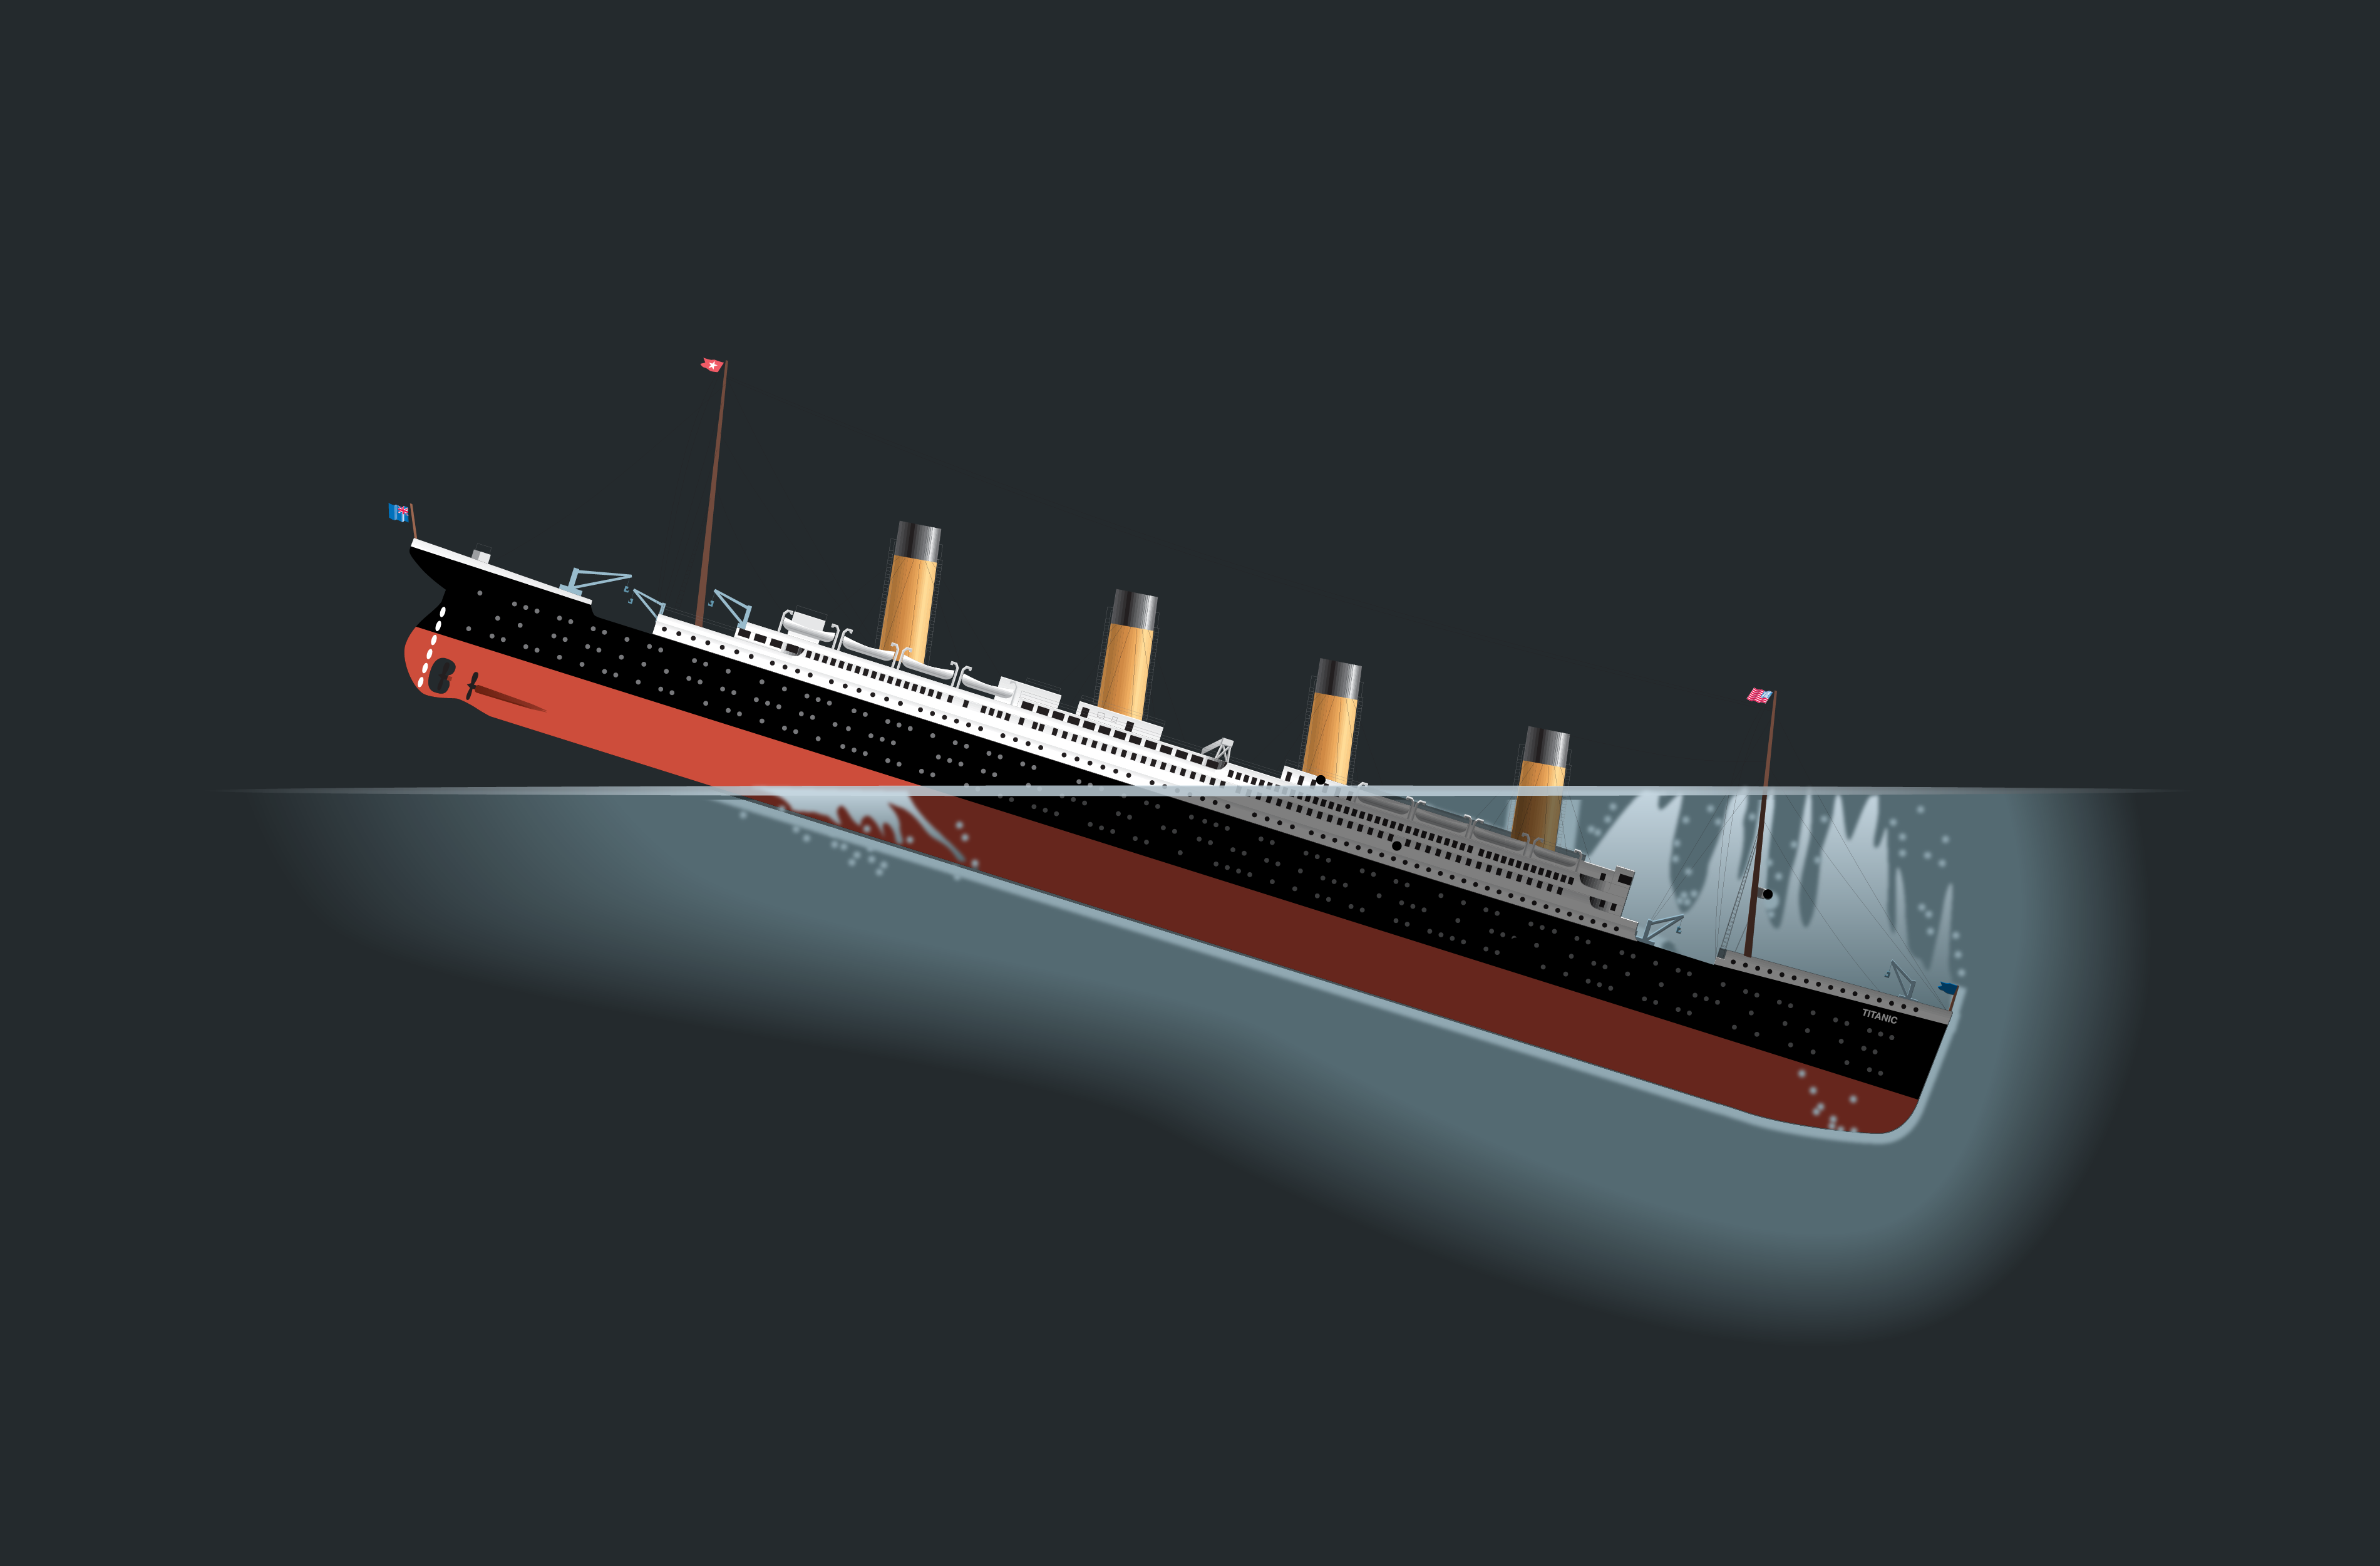

# Titanic Machine Learning from Disaster



# Table of Contents

* [1. Introduction](#introduction)
* [2. Loading the Data](#loading-data)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#fe-dw)
* [5. Model Training](#model-training)

- Reference:
    - [Model Training](https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic#Part-7:-Modeling-the-Data)
#  1. Introduction <a class="anchor" id="introduction"></a>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Loading the Data <a class="anchor" id="loading-data"></a>

In [2]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [5]:
train_df.columns, test_df.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
#Preview data
train_df.head()
# PassengerId is not feature so use it for index

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.set_index(train_df.PassengerId,inplace = True)
train_df.drop(columns = ['PassengerId'], axis = 1,inplace = True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
test_df.set_index(test_df.PassengerId,inplace = True)
test_df.drop(columns = ['PassengerId'], axis = 1,inplace = True)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## 1.1 Feature Classfication: Categorical vs Numerical

+ This helps us select the appropriate plots for visualization

### Which features are categorical?

+ Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
+ To classify the samples into sets of similar samples

### Which features are numerical?
+ Numerical features: `discrete`, `continuous` or `timeseries`
+ These values change from sample to sample

In [11]:
train_df.info()
# Age and Cabin are columns which have missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


  - Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),  `SibSp` , `Parch`
      - `Embarked`: Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton
  - Numerical: (continuous) `Age`, `Fare`, (discrete)
  
  - Mix types of data: `Ticket`, `Cabin`
  - Contain Error/Typo: `Name`
  - Blank or Null: `Cabin` > `Age` > `Embarked`
  - Various Data Type: String, Int, Float
  
According to the data dictionary, we know that if a passernger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_to_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_to_category(train_df,converted_features)
convert_to_category(test_df,converted_features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


### 1.1.1. Distribution of Numerical feature values across the samples

In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 1.1.2. Distribution of Categorical features

In [18]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis (EDA)<a class="anchor" id="eda"></a>

## 3.1. Correlating categorical features
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),  `SibSp` , `Parch`

### Target Variable: `Survived`

In [20]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.

### `Sex`

In [22]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


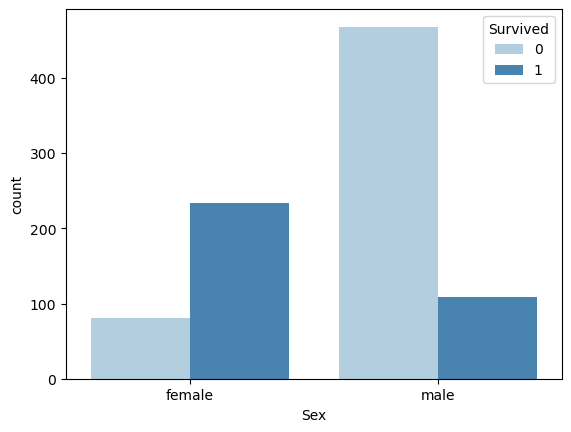

In [26]:
sns.countplot(data= train_df, x = 'Sex', hue = 'Survived',palette="Blues");

- Remaining Categorical Feature Columns

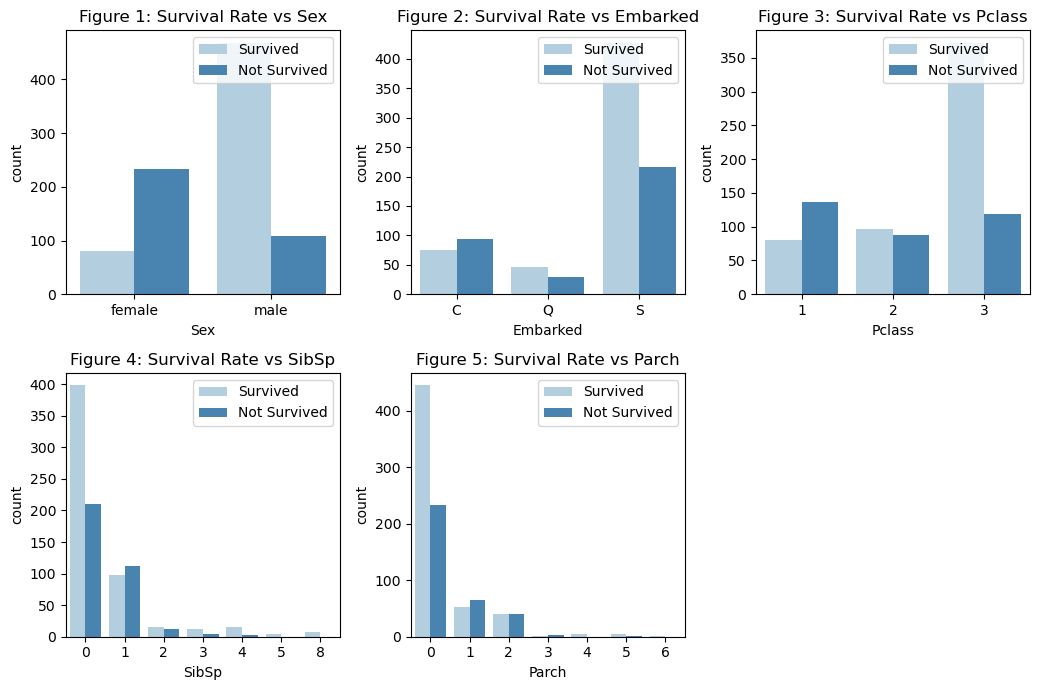

In [36]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols, figsize = (n_cols*3.5,n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if i < len(cols) :
            ax_i = ax[r,c]
            sns.countplot(data= train_df, x = cols[i], hue = "Survived", palette="Blues",ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = '', loc = 'upper right', labels={'Not Survived', 'Survived'})
ax.flat[-1].set_visible(False); # remove the last subplot
plt.tight_layout();
plt.show()

### Observation:

* **Survival Rate**: 
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate  
    - Fig 4: People going with 0 `SibSp` are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 `Parch` are mostly not survived 
    
## 3.2. EDA for Numerical Features
- Numerical Features: (continuous) `Age`, `Fare`

### Age

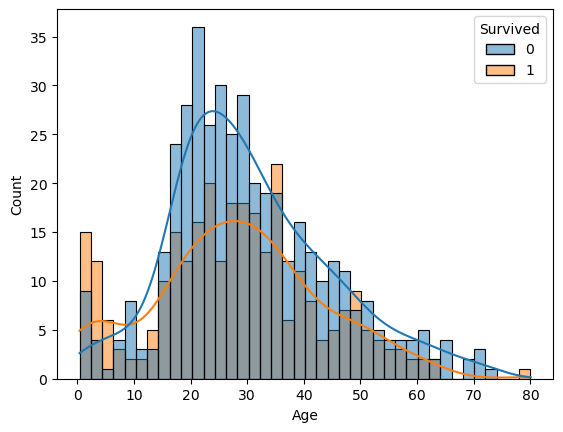

In [41]:
sns.histplot(data=train_df, x= 'Age',hue = "Survived" ,bins = 40,kde=True);

+ Majority passenger were 18-40 ages
+ Children had more chance to survive than other ages

### Fare

In [44]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

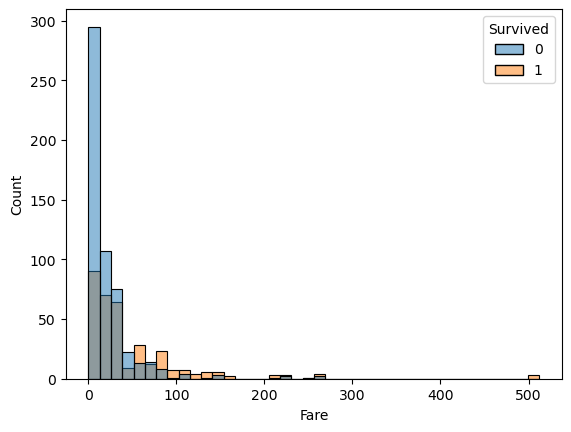

In [50]:
sns.histplot(data= train_df,x = "Fare",hue="Survived" ,bins = 40);

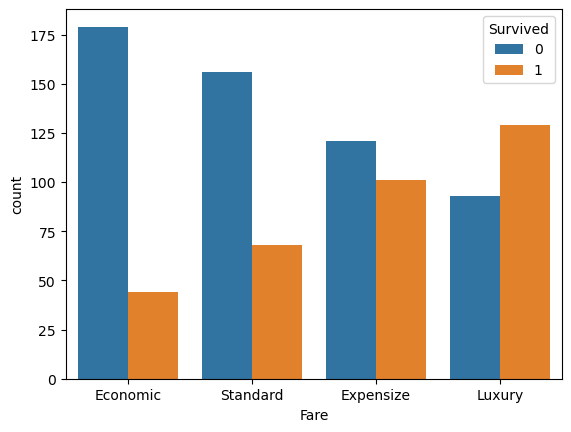

In [54]:
# To name for 0-25% quartile, 25-50,50-75,75-100
fare_categories =['Economic', 'Standard', 'Expensize', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'],4,labels = fare_categories)

sns.countplot(data=train_df,x = quartile_data,hue = "Survived");

In [55]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0–100$]`.
    - The distribution is skewed to the left with `75%` of the fare paid under `$31` and a max paid fare of `$512`. 
- Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more chance to survive

# 4.  Feature Engineering & Data Wrangling <a class="anchor" id="fe-dw"></a>
## 4.1. Feature Engineering
### Name

- Regular Expression

In [57]:
train_df['Name'].to_frame()

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


In [63]:
import re # regular expression
def extract_title(name):
    return (re.compile(r",([\w\s]+)\.")).search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name : extract_title(name))

In [64]:
train_df['Title'].value_counts()
#Mrs . Martin(Elizabeth L is wrong value

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Mme               1
Jonkheer          1
Lady              1
Don               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [66]:
test_df['Title'] = test_df['Name'].apply(lambda name : extract_title(name))
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [72]:
def group_title(title):
    if title in ['Mr','Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title));
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title));

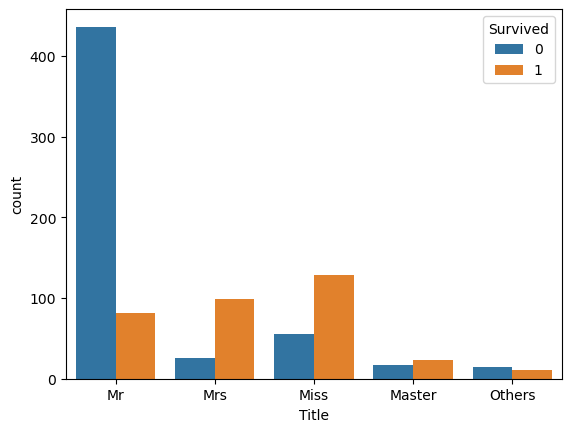

In [73]:
sns.countplot(data=train_df, x ='Title', hue = 'Survived');

# Family

- `SibSp`, `Parch`

In [83]:
train_df['Family_Size'] = (train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1).astype("category") 
test_df['Family_Size'] = (test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1).astype("category") 
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    category
 1   Name         418 non-null    object  
 2   Sex          418 non-null    category
 3   Age          332 non-null    float64 
 4   SibSp        418 non-null    category
 5   Parch        418 non-null    category
 6   Ticket       418 non-null    object  
 7   Fare         417 non-null    float64 
 8   Cabin        91 non-null     object  
 9   Embarked     418 non-null    category
 10  Title        418 non-null    object  
 11  Family_Size  418 non-null    category
dtypes: category(6), float64(2), object(4)
memory usage: 26.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null   

In [92]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'],bins=[0,1,4,7,20], labels = ['Solo','Small','Medium', 'Large']); #(0,1], (1,4], (4,7], (7,end]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'],bins=[0,1,4,7,20], labels = ['Solo','Small','Medium', 'Large']); #(0,1], (1,4], (4,7], (7,end]

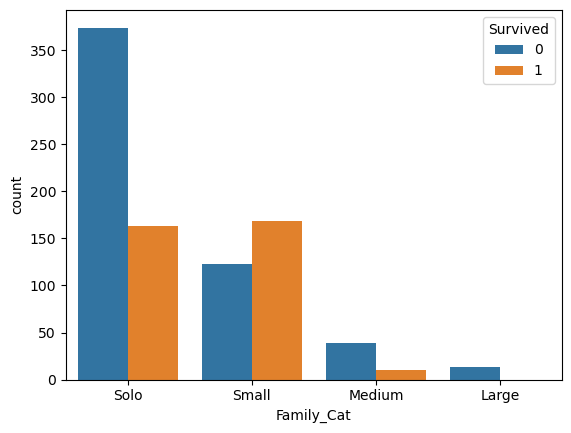

In [93]:
sns.countplot(data=train_df,x = 'Family_Cat', hue = 'Survived');

# 4.2. Data Wrangling

In [96]:
num_features = ['Age','Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [98]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


## Filling missingg values

#### Age
- Filling missing values with `median` of whole dataset


In [103]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age'].reset_index()
age_by_sex_pclass

,Sex,Pclass,Age
0,female,1,35.0
1,female,2,28.0
2,female,3,21.5
3,male,1,40.0
4,male,2,30.0
5,male,3,25.0


In [104]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [106]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [170]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [171]:
# preprocess pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [172]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [173]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [174]:
preprocessed_X_df = pd.DataFrame(preprocessor.transform(X), columns=X.columns)# X -> X_train, X_val
preprocessed_X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=X_test.columns)

In [175]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

oh_enc = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(oh_enc.fit_transform(preprocessed_X_df[['Embarked']]).toarray()).head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [176]:
le_enc = LabelEncoder()

pd.DataFrame(le_enc.fit_transform(preprocessed_X_df['Embarked'])).head()

,0
0,2
1,0
2,2
3,2
4,2


In [177]:
for cat_col in ['Sex', 'Embarked', 'Title', 'Family_Cat']:
    le_enc = LabelEncoder()
    preprocessed_X_df.loc[:, cat_col] = le_enc.fit_transform(preprocessed_X_df[cat_col])
    preprocessed_X_test_df.loc[:, cat_col] = le_enc.transform(preprocessed_X_test_df[cat_col])
    

In [178]:
preprocessed_X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         418 non-null    object
 1   Fare        418 non-null    object
 2   Sex         418 non-null    int64 
 3   Pclass      418 non-null    object
 4   Embarked    418 non-null    int64 
 5   Title       418 non-null    int64 
 6   Family_Cat  418 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 23.0+ KB


In [179]:
def cast_types(df):
    df['Age'] = df['Age'].astype(float)
    df['Fare'] = df['Fare'].astype(float)
    df['Pclass'] = df['Pclass'].astype(int)
    return df

preprocessed_X_df = cast_types(preprocessed_X_df)
preprocessed_X_test_df = cast_types(preprocessed_X_test_df)

In [159]:
X = preprocessor.transform(X)

In [182]:
preprocessed_X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Fare        418 non-null    float64
 2   Sex         418 non-null    int64  
 3   Pclass      418 non-null    int64  
 4   Embarked    418 non-null    int64  
 5   Title       418 non-null    int64  
 6   Family_Cat  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# 5. Model Training

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(preprocessed_X_df, y, test_size=0.2)

In [184]:
X_train.shape, X_val.shape


((712, 7), (179, 7))

In [185]:
X_test.shape

(418, 7)

In [200]:
# Binary Classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [192]:
classifer = LogisticRegression(solver='liblinear', 
                               penalty='l2', 
                               max_iter=1000) #Max_iter = 1000 to avoid ConvergenceWarning: lbfgs failed to converge (status=1)
classifer_ = classifer.fit(X_train, y_train)

classifer_.score(X_val, y_val)

0.7932960893854749

In [193]:
y_pred = classifer_.predict(X_val)
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_val,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,94,16
Survived,21,48


In [194]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



- y = ax1 + bx2 + bias -> y = y = ax1^2 + bx2^2 + cx1x2 + bias

In [198]:
poly = PolynomialFeatures(degree = 2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)
poly_features_X_train.shape, X_train.shape

((712, 36), (712, 7))

In [199]:
poly_classifer = LogisticRegression(max_iter=10000)
poly_classifer.fit(poly_features_X_train, y_train)
poly_classifer.score(poly_features_X_val, y_val)

0.8156424581005587

In [202]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 1) #Initialize tree with some random value
decision_tree.fit(X_train, y_train)
decision_tree.score(X_val, y_val)

0.7877094972067039

### 5.1 Cross-Validation

In [206]:
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 1)

dt_scores = cross_val_score(decision_tree, X_train, y_train, scoring='accuracy', cv=5)
dt_scores.mean(), dt_scores.std()

(0.8216881709839458, 0.034274131617103513)

In [207]:
classifer_cv = LogisticRegression(solver='liblinear', 
                               penalty='l2', 
                               max_iter=1000) #Max_iter = 1000 to avoid ConvergenceWarning: lbfgs failed to converge (status=1)
classifer_scores = cross_val_score(classifer_cv, X_train, y_train, scoring='accuracy', cv=5)
classifer_scores.mean(), classifer_scores.std()

(0.8104304146557668, 0.02603072161616341)

### 5.2 Baseline Model Comparison

In [210]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [215]:
seed = 2023
model = [
    LinearSVC(max_iter=12000,random_state = seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(solver='liblinear', max_iter = 1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mf/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


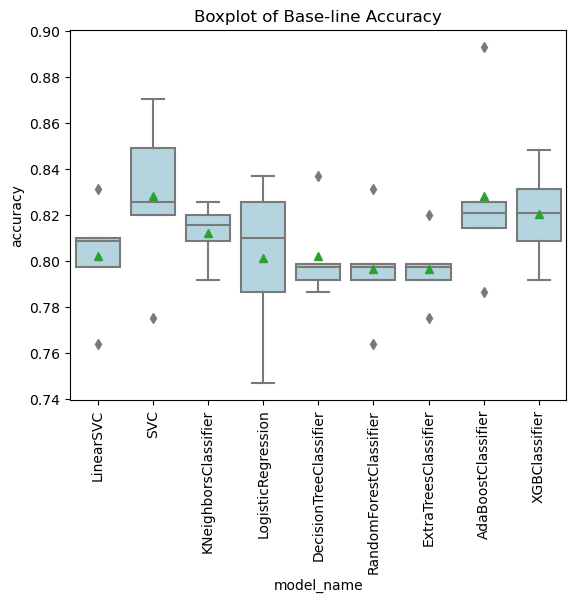

,Mean,Standard deviation
model_name,,
AdaBoostClassifier,0.828291,0.039399
SVC,0.828259,0.035786
XGBClassifier,0.820426,0.021397
KNeighborsClassifier,0.812567,0.012987
DecisionTreeClassifier,0.802473,0.019964
LinearSVC,0.802461,0.024694
LogisticRegression,0.801337,0.035726
ExtraTreesClassifier,0.796855,0.016115
RandomForestClassifier,0.796855,0.023986


In [221]:
def generate_baseline_results(models, X,y, metrics, cv = 5, plot_results=False):
    #Define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state = 2022)
    entries = []
    # Loop through models
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    #List down accuracy per fold for each model  
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', metrics])

    #Plot Base-Line Model Performance
    if plot_results:
        sns.boxplot(x='model_name', y=metrics, 
                    data=cv_df, 
                    color='lightblue', 
                    showmeans=True)
        plt.title("Boxplot of Base-line Accuracy")
        plt.xticks(rotation = 90)
        plt.show()
    
    #Summary
    mean = cv_df.groupby('model_name')[metrics].mean()
    std= cv_df.groupby('model_name')[metrics].std()

    baseline_results = pd.concat([mean, std], axis= 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard deviation']

    # sort by accuracy
    baseline_results.sort_values(by=['Mean'], axis=0, ascending=False, inplace=True)
    return baseline_results

baseline_results = generate_baseline_results(model, preprocessed_X_df, y, 'accuracy',plot_results=True)
baseline_results